#同時改訂(simultaneous revisions)とは
「各 t 期において，N 人全員が行動を (変えたければ) 変えることができる．」  
##協調ゲーム (coordination game)
以下の利得表のもと各人は戦略をとる場合を考える。 

[(4, 4), (0, 3)]  
[(3, 0), (2, 2)]

混合戦略ナッシュ均衡の組は、  
(1, 0), (1, 0)  
(2/3, 1/3), (2/3, 1/3)  
(0, 1), (0, 1)

全体の人数(N)が5人で、今戦略1を取っている人数が3人だとする。  
ということは自分自身と対戦することも許すならば、3/5 > 1/3 より戦略1をとることが各人にとって望ましい。  

よって、みんなで一斉に戦略を変えるチャンスが与えられるならば、  
次の期において戦略1を5人全員が選択する確率は、
${}_5 C _5 (1-\frac{\epsilon}{2})^{5} (\frac{\epsilon}{2})^{0}$　(つまり$(1-\frac{\epsilon}{2})^{5}$  )  
4人が戦略1を選択する確率は
${}_5 C _4 (1-\frac{\epsilon}{2})^{4} (\frac{\epsilon}{2})^{1}$  
...  
0人が戦略1を選択する確率は
${}_5 C _0 (1-\frac{\epsilon}{2})^{0} (\frac{\epsilon}{2})^{5}$（つまり$(\frac{\epsilon}{2})^{5}$）   

これより戦略１を取る人数ごとの確率分布は**二項分布**であると言える。

二項分布をコードで書くときに便利な関数が、[scipy.stats.binom](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.binom.html)  

サイトより引用

```
Notes

The probability mass function for binom is:

binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
for k in {0, 1,..., n}.

binom takes n and p as shape parameters.
```

つまり、binom.pmf(k, n, p)という形で使うことができ、それぞれの引数はこのように定義されている。  

実際に使ってみる。

In [1]:
%matplotlib inline
from scipy.stats import binom
import matplotlib.pyplot as plt 

t期において戦略1を3人が取っている状況を考え、epsilonを0.1と仮定する。  
t+1期で戦略1を取る人数が5人全員となる確率$(1-\frac{\epsilon}{2})^{5}$は、

In [2]:
epsilon = 0.1
binom.pmf(5, 5, 1-epsilon/2)

0.77378093749999977

t+1期で戦略1を取る人数が4人となる確率${}_5 C _4 (1-\frac{\epsilon}{2})^{4} (\frac{\epsilon}{2})^{1}$ は、

In [3]:
binom.pmf(4, 5, 1-epsilon/2)

0.20362656250000011

t+1期で戦略1を取る人数が4人となる確率${}_5 C _3 (1-\frac{\epsilon}{2})^{3} (\frac{\epsilon}{2})^{2}$ は、

In [4]:
binom.pmf(3, 5, 1-epsilon/2)

0.021434375000000037

t+1期に戦略1を取る人数毎の確率をプロットしてみると、

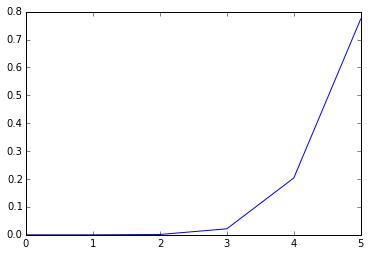

In [5]:
P = [binom.pmf(i, 5, 1-epsilon/2) for i in range(5+1)]
plt.plot(range(5+1), P)

実験を行わず合理的に戦略を選択すれば各人は戦略1を取るはずであり、グラフはt+1期に戦略1を取る人数が多いほど確率も高くなるということを示しており整合的である。  
この結果を遷移行列にあてはめると、
t期において戦略1を選択していた人が3人と仮定していたので、P[3]の行に上で求めた確率がそれぞれ付与されていく。